# Content and Objective

+ Show estimation of channel impulse response
+ Method: Get know Tx signal and perform LS estimation by solving matrix-vector equation

In [4]:
# importing
import numpy as np
import scipy.signal
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib

import galois
from pn_lfsr import pnsequence, zdcsequence

# showing figures inline
%matplotlib inline

In [5]:
# plotting options 
font = {'size'   : 30}
plt.rc('font', **font)
plt.rc('text', usetex=False)

matplotlib.rc('figure', figsize=(30, 8) )

# Get PN Sequence and Show Properties

In [6]:
# init GF_2 object
GF_2 = galois.GF(2)

# generate PN sequence
sequence_length = int( 1e3 )
order = 12

primitive_polynomial = galois.matlab_primitive_poly(2, degree=order) #According documentation supported up to an order of 16
print(primitive_polynomial)
seed = GF_2.Zeros(order)
seed[-1] = 1  # seed [0,0..,0,1]--> must be non zero array!

pn = pnsequence(prim_poly=primitive_polynomial, seed=seed, sequence_length=sequence_length)

# BPSK modulation
pn_mod = 1 - 2 * pn

acf = np.correlate( pn_mod, pn_mod, 'full')
acf = acf / len( pn_mod ) 


x^12 + x^6 + x^4 + x + 1


Text(0.5, 0, '$k$')

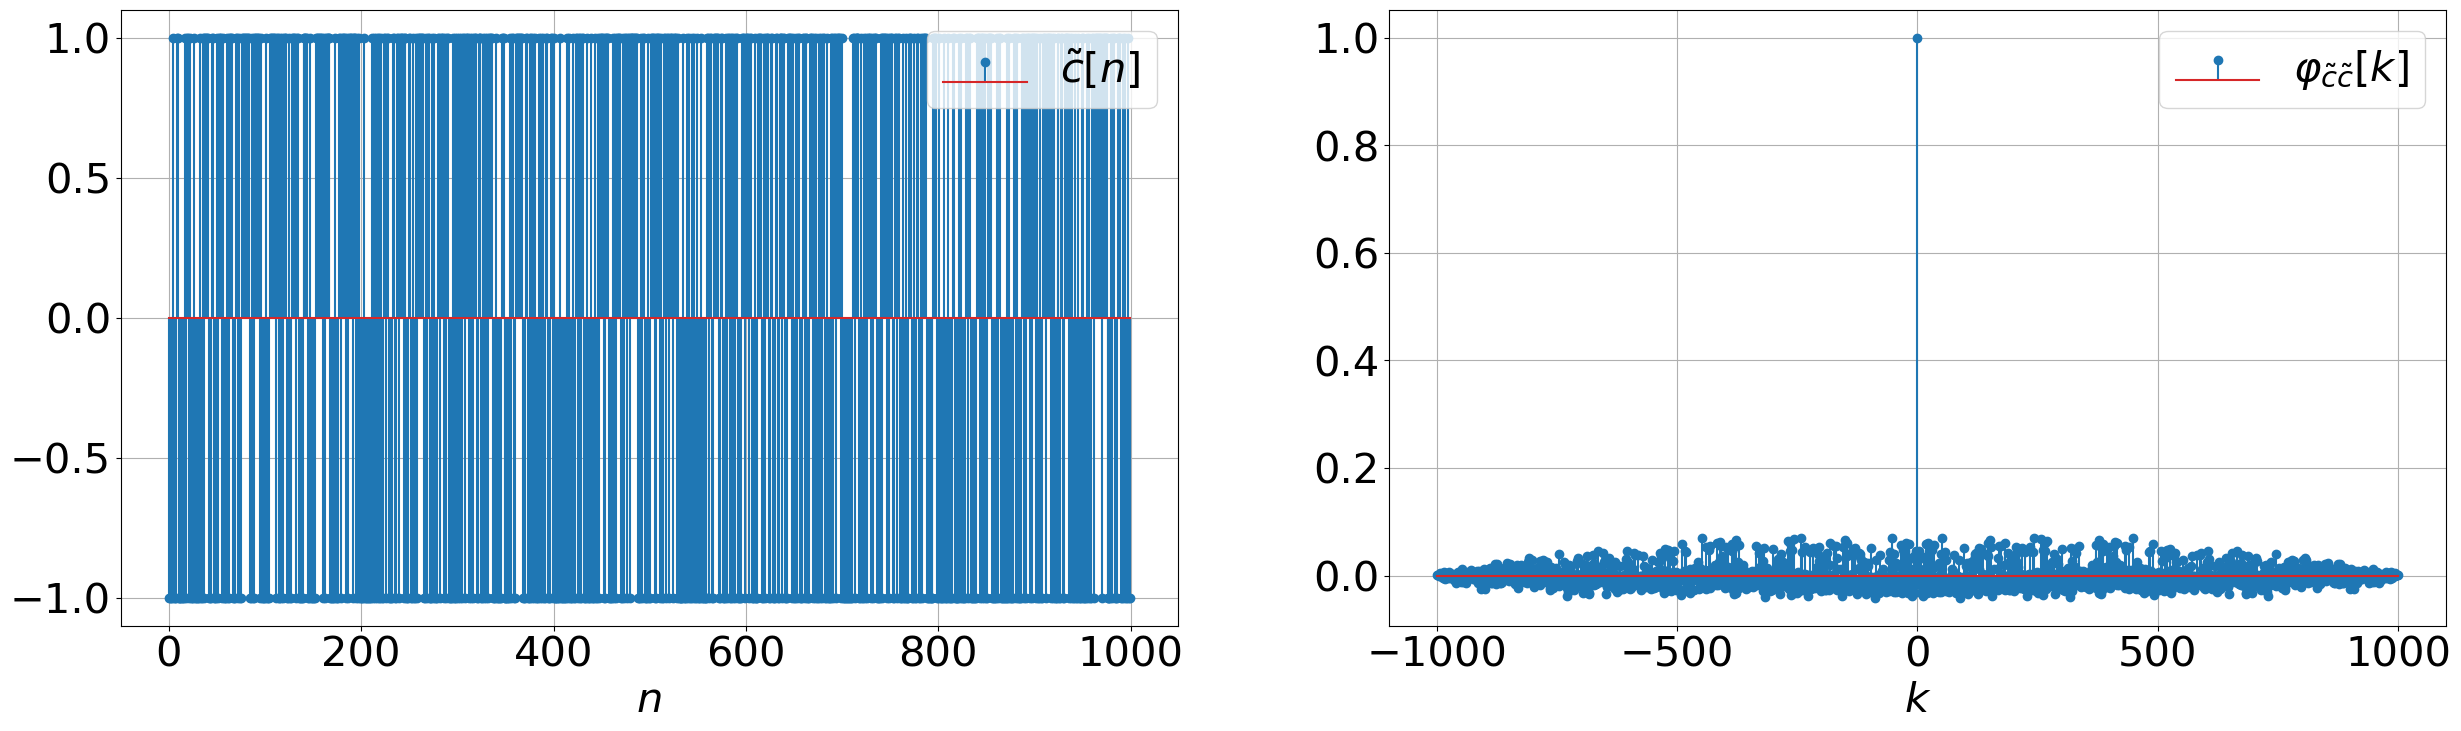

In [7]:
plt.figure()

plt.subplot(121)
plt.stem( pn_mod, label='$\\tilde{c}[n]$' ) 

plt.grid(True)
plt.legend( loc='upper right' )
plt.xlabel('$n$')


plt.subplot(122)
plt.stem( np.arange( - ( len( pn ) - 1), len( pn ) ), acf, label='$\\varphi_{\\tilde{c}\\tilde{c}}[k]$' ) 

plt.grid(True)
plt.legend( loc='upper right' )
plt.xlabel('$k$')


# Get Random Channel Impulse Response

In [8]:
# define channel impulse response
N_h = 15 

h = np.random.randn(N_h) + 1j * np.random.randn(N_h)
h /= np.linalg.norm(h)


# Add Noise and Estimate

In [9]:
# define length of estimated impulse reponse and resulting convolution
# NOTE: Values not necessarily corresponding to true lengths
N_est = 75
N_conv_est = len( pn ) + N_est - 1


# define SNR in dB 
snr_db =3

In [10]:

# get Tx signal and pad zeros if necessary due to wrong estimation length
x = np.convolve( pn_mod, h )
if N_conv_est > len(  x ):
    x = np.hstack( ( x, np.zeros( N_conv_est - len(x) ) ) )

# get output signal by adding noise
sigma2 = 10 ** ( - snr_db / 10  )
y = x + np.sqrt( sigma2 / 2) * ( np.random.randn( len(x) ) + 1j * np.random.randn( len(x) ) )


# define transmission matrix X
# NOTE: Notation as in the lecture slides
X = np.zeros( ( len(y), N_conv_est ) )

for k in np.arange(N_est):        
    X[ k : k + len( pn ), k] = pn_mod

    
# do channel estimation by LS estimation using pseudo-inverse of X
h_est = np.dot( np.linalg.pinv(X), y )


# Show Results

Text(0.5, 1.0, 'SNR = 3 (dB)')

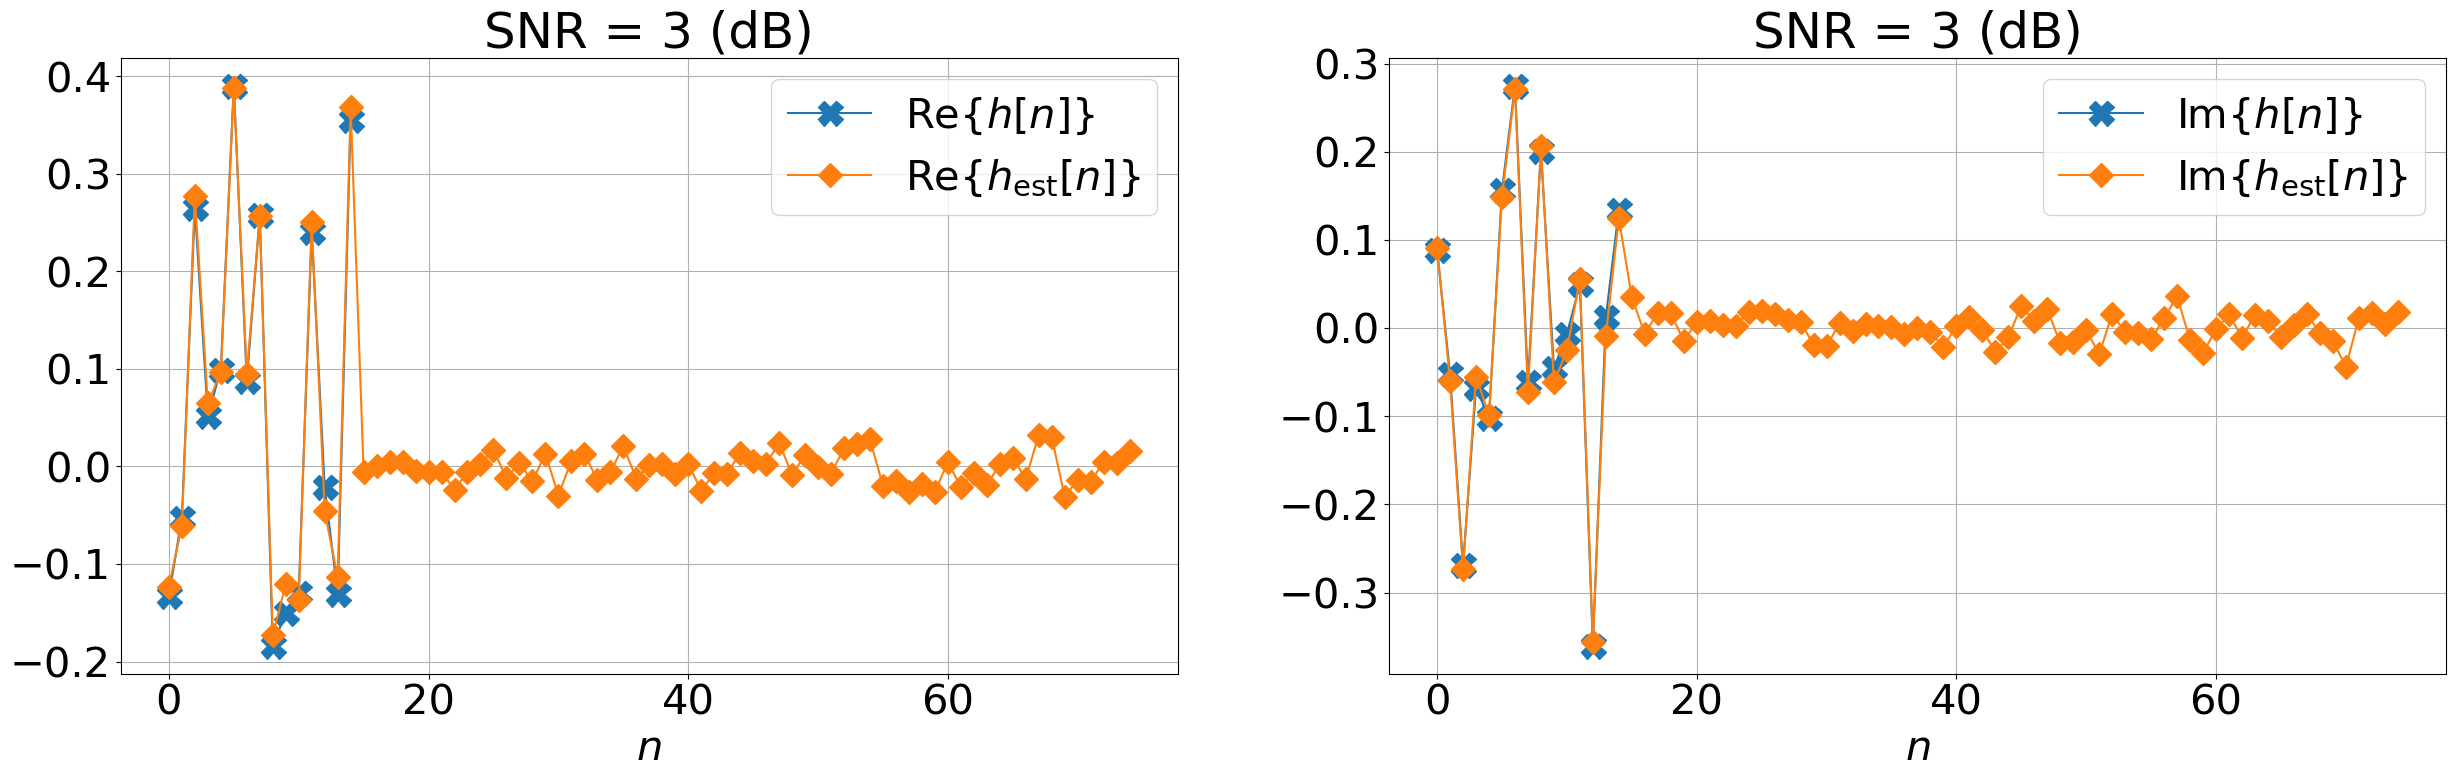

In [11]:
plt.figure()

plt.subplot(121)
plt.plot( np.real(h[ : N_est ]), '-X', ms=18, label='$\mathrm{Re}\{h[n]\}$' ) 
plt.plot( np.real(h_est[ : N_est ]), '-D', ms=12, label='$\mathrm{Re}\{h_{\mathrm{est}}[n]\}$') 
plt.grid(True)
plt.legend( loc='upper right' )
plt.xlabel('$n$')
plt.title('SNR = '+str(snr_db)+' (dB)')

plt.subplot(122)
plt.plot( np.imag(h[ : N_est ]), '-X', ms=18, label='$\mathrm{Im}\{h[n]\}$' ) 
plt.plot( np.imag(h_est[ : N_est ]), '-D', ms=12, label='$\mathrm{Im}\{h_{\mathrm{est}}[n]\}$') 
plt.grid(True)
plt.legend( loc='upper right' )
plt.xlabel('$n$')
plt.title('SNR = '+str(snr_db)+' (dB)')